In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__

'1.6.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print("Size of: ")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of: 
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [5]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
data.train.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [7]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [8]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

In [9]:
# We know that MNIST images are 28 pixels in each dimension
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits
num_classes = 10

## Helper function for plotting images

In [10]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        # Show true and predicted classes
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

#### Plot a few images to see if data is correct

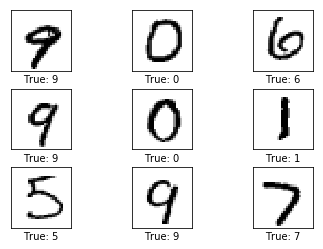

In [11]:
# Get the first images from the test-set
images = data.test.images[9:18]

# Get the true classes for those images
cls_true = data.test.cls[9:18]

# Plot the images and labels using our helper-function above
plot_images(images=images, cls_true=cls_true)

## Tensorflow Graph

A TensorFlow graph consists of the following parts which will be detailed below
1. Placeholder variables used to change the input to the graph
2. Model variables that are going to be optimized so as to make the model perform better
3. The model which is essentially just a mathematical function that calculates some output
given the input in the placeholder variables and the model variables
4. A cost measure that can be used to guide the optimization of the variables
5. An optimization method which updates the variables of the model

#### Placeholder variables

In [12]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [13]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [14]:
y_true_cls = tf.placeholder(tf.int64, [None])

#### Variables to be optimized

In [15]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

In [16]:
biases = tf.Variable(tf.zeros([num_classes]))

In [17]:
logits = tf.matmul(x, weights) + biases

In [18]:
y_pred = tf.nn.softmax(logits)

In [19]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [20]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                       labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [21]:
cost = tf.reduce_mean(cross_entropy)

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [23]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Tensorflow Run

#### Create Tensorflow session

In [24]:
session = tf.Session()

#### Initialize variable

In [25]:
session.run(tf.global_variables_initializer())

In [26]:
batch_size = 100

In [27]:
# def optimize(num_iterations):
for i in range(100000):
    
    # x_batch now holds a batch of images and
    # y_true_batch are the true labels for those images
    x_batch, y_true_batch = data.train.next_batch(batch_size)
    
    # 
    feed_dict_train = {x: x_batch,
                      y_true: y_true_batch}
    
    session.run(optimizer, feed_dict=feed_dict_train)

In [28]:
feed_dict_test = {
    x: data.test.images,
    y_true: data.test.labels,
    y_true_cls: data.test.cls
}

In [29]:
# def print_accuracy():
acc = session.run(accuracy, feed_dict=feed_dict_test)

In [30]:
print("Accuracy on test set: {0:.1%}".format(acc))

Accuracy on test set: 92.5%


In [31]:
cls_true = data.test.cls

In [32]:
# Get the true classification for the test-set
data.test.cls

array([7, 2, 1, ..., 4, 5, 6])

In [33]:
# Get the predicted classification for the test-set
cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

In [34]:
# get the confusion matrix using sklearn
cm = confusion_matrix(y_true=cls_true,
                     y_pred=cls_pred)

In [35]:
# confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
print(cm)

[[ 960    0    0    3    1    8    3    3    2    0]
 [   0 1111    7    0    0    2    3    2   10    0]
 [   8    5  943   10    8    3   12    8   32    3]
 [   4    2   33  894    3   26    3    9   30    6]
 [   1    3   12    1  920    0    6    8    6   25]
 [  10    4    4   30    8  771   13    8   39    5]
 [   8    4   12    1    5   18  906    2    2    0]
 [   0    8   27    3    4    1    0  954    3   28]
 [  10   12    9   13    6   19    8    9  880    8]
 [   8    7    1    9   31    8    0   25   12  908]]


In [36]:
cls_true

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
cls_pred

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [39]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Text(95.305,0.5,'True')

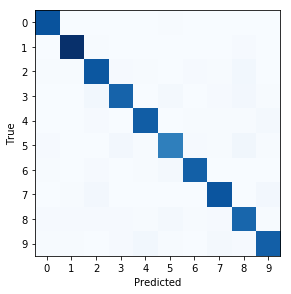

In [40]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.tight_layout()
# plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')

In [41]:
correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                               feed_dict=feed_dict_test)

In [42]:
incorrect = (correct == False)

In [43]:
incorrect

array([False, False, False, ..., False, False, False], dtype=bool)

In [44]:
incorrect.shape

(10000,)

In [45]:
images = data.test.images[incorrect]

In [46]:
images.shape

(753, 784)

In [47]:
cls_pred = cls_pred[incorrect]

In [48]:
cls_true = data.test.cls[incorrect]

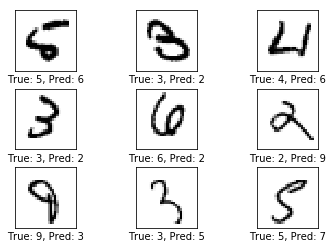

In [49]:
plot_images(images=images[0:9],
            cls_true=cls_true[0:9],
            cls_pred=cls_pred[0:9])